In [84]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import IPython.display
import copy

# Lista 6 (11 pkt.)

## Zadanie 1 (1 pkt.)

Wczytaj obrazek **miki.png**

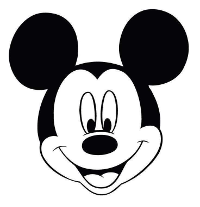

In [2]:
def dec2bin(dec_str,pad):
    return format(int(dec_str),'0'+str(pad)+'b')

img=Image.open('miki.png')
arr=np.array(img).ravel()
arr_bin=[dec2bin(d,pad='8') for d in arr]
bits=''.join(arr_bin)
img

i zaszyfruj go za pomocą DESa z kluczem:

In [3]:
key='0111101000001010110010000001010101111111100000000000101000110001'

stosując szyfrowanie blok po bloku, czyli tak jak na liście 3., tzn. w trybie ECB. Schemat szyfrowania:

<img src="ECB_encryption.png" width="1000" align="left"/>

oraz deszyfrowania:

<img src="ECB_decryption.png" width="1000" align="left"/>

Code from List 3:

In [5]:
def bin2dec(bin_str):
    return int(bin_str, 2)

In [6]:
def shift_left(tab,n):
    return tab[n:] + tab[0:n]

In [7]:
def permute(k,perm):
    res = ""
    for idx in perm:
        res += k[idx]
    return res

In [8]:
def xor(bin_str1,bin_str2):
    if len(bin_str1) != len(bin_str2):
        return ""
    res = ""
    for idx in range(len(bin_str1)):
        res += str(int(bin_str1[idx]) ^ int(bin_str2[idx]))
    return res

In [9]:
PC1 = [56, 48, 40, 32, 24, 16,  8,  0, 57, 49, 41, 33, 25, 17,  9,  1, 58,
       50, 42, 34, 26, 18, 10,  2, 59, 51, 43, 35, 62, 54, 46, 38, 30, 22,
       14,  6, 61, 53, 45, 37, 29, 21, 13,  5, 60, 52, 44, 36, 28, 20, 12,
       4, 27, 19, 11,  3]

shift_table = [1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1 ]

PC2=[13, 16, 10, 23,  0,  4,  2, 27, 14,  5, 20,  9, 22, 18, 11,  3,
     25, 7, 15,  6, 26, 19, 12,  1, 40, 51, 30, 36, 46, 54, 29, 39,
     50, 44, 32, 47, 43, 48, 38, 55, 33, 52, 45, 41, 49, 35, 28, 31]

In [10]:
def key_schedule(key):
    subkeys = []
    key = permute(key, PC1)
    mid = len(key)//2
    left_half, right_half = key[:mid], key[mid:]

    for shift in shift_table:
        left_half = shift_left(left_half, shift)
        right_half = shift_left(right_half, shift)

        subkey = left_half + right_half
        subkey = permute(subkey, PC2)
        subkeys.append(subkey)
    return subkeys

In [12]:
def Feistel(message, subkeys, F):
    mid = len(message)//2
    left_half, right_half = message[:mid], message[mid:]

    for subkey in subkeys:
        encrypted_msg = F(right_half, subkey)
        left_half = xor(left_half, encrypted_msg)
        left_half, right_half = right_half, left_half

    return right_half + left_half

In [14]:
def F(right, subkey):
    message = permute(right, E)
    xored_message = xor(message, subkey)
    res = ""

    for i in range(0, len(message), 6):
        row_number = bin2dec(xored_message[i] + xored_message[i+5])
        col_number = bin2dec(xored_message[i+1:i+5])
        res += dec2bin(SBox[i//6][row_number][col_number], 4)

    return permute(res, P)

In [15]:
E = [31,  0,  1,  2,  3,  4,  3,  4,  5,  6,  7,  8,  7,  8,  9, 10, 11,
     12, 11, 12, 13, 14, 15, 16, 15, 16, 17, 18, 19, 20, 19, 20, 21, 22,
     23, 24, 23, 24, 25, 26, 27, 28, 27, 28, 29, 30, 31,  0]

SBox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
         [ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
         [ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
         [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]],

        [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
         [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
         [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
         [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]],

        [ [10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
          [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
          [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
          [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]],

        [ [7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
          [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
          [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
          [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14] ],

        [ [2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
          [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
          [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
          [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3 ]],

        [ [12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
          [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
          [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
          [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13] ],

        [ [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
          [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
          [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
          [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12] ],

        [ [13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
          [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
          [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
          [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11] ] ]

P = [ 15,  6, 19, 20, 28, 11, 27, 16,  0, 14, 22, 25,  4, 17, 30,  9,  1,
      7, 23, 13, 31, 26,  2,  8, 18, 12, 29,  5, 21, 10,  3, 24]

In [16]:
IP = [57, 49, 41, 33, 25, 17,  9,  1, 59, 51, 43, 35, 27, 19, 11,  3, 61,
      53, 45, 37, 29, 21, 13,  5, 63, 55, 47, 39, 31, 23, 15,  7, 56, 48,
      40, 32, 24, 16,  8,  0, 58, 50, 42, 34, 26, 18, 10,  2, 60, 52, 44,
      36, 28, 20, 12,  4, 62, 54, 46, 38, 30, 22, 14,  6]

FP = [39,  7, 47, 15, 55, 23, 63, 31, 38,  6, 46, 14, 54, 22, 62, 30, 37,
      5, 45, 13, 53, 21, 61, 29, 36,  4, 44, 12, 52, 20, 60, 28, 35,  3,
      43, 11, 51, 19, 59, 27, 34,  2, 42, 10, 50, 18, 58, 26, 33,  1, 41,
      9, 49, 17, 57, 25, 32,  0, 40,  8, 48, 16, 56, 24]

In [18]:
def DES(message, subkeys):
    permuted_message = permute(message, IP)
    feistel_cipher = Feistel(permuted_message, subkeys, F)
    permuted_message = permute(feistel_cipher, FP)
    return permuted_message

Wyświetl zaszyfrowany obrazek.

In [19]:
def split_img(img_bin,n):
    img_split=[]
    for i in range(0, len(img_bin), n):
        img_split.append(img_bin[i:i+n])
    return img_split
#img_t to ciąg bitów po zaszyfrowaniu

In [25]:
blocks = split_img(bits, 64)
subkeys = key_schedule(key)

img_t = ''

for block in blocks:
    img_t += DES(block, subkeys)

img=np.array([bin2dec(b) for b in split_img(img_t,8)]).reshape(np.array(img).shape)
# Image.fromarray(np.uint8(np.array(img)))

Mimo zaszyfrowania łatwo rozpoznać co było na obrazku.

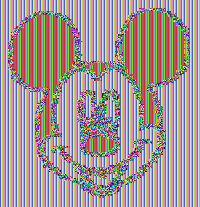

In [83]:
img=Image.open('miki_enc_ecb.png')
img

## Zadanie 2 (2 pkt.)

Zaimplementuj tryb szyfrowania CBC.

<img src="CBC_encryption.png" width="1000" align="left"/>

In [4]:
def CBC(msg,key,iv):
    pass

In [5]:
#key to zmienna z poprzedniego zadania
iv='0011111111001100000111011100110100100101010100000111010001000110'
msg='1000110001101011011101110010100111101111101100111100001010100001011111110100000100100000111011001011000001011100110111101111110100000000100101011101110010000000110011011100000111000110011100111000010111111111011111000110001010101001101111110000010110011011'
print(CBC(msg,key,iv)=='1111101000110001101111001100101101011001101010001101010101100111011001100111010011001011100001001111011000001111110010011110011101010000101011010011011100011110011011001011100100011100011001011101110011110001110100010111001100100010111101011111101010111000')

False


Zaszyfruj obrazek z zadania 1. za pomocą DESa w trybie CBC, zaszyfrowany obrazek wyświetl i zobacz czy nadal widoczna jest na nim Myszka Miki.

## Zadanie 3 (1 pkt.)

Zaimplementuj deszyfrację w trybi CBC. Zdeszyfruj zaszyfrowany w poprzednim zadaniu obrazek i sprawdź czy otrzymałeś pierwotny obrazek.

<img src="CBC_decryption.png" width="1000" align="left"/>

In [6]:
def CBCde(msg,key,iv):
    pass

## Zadanie 4 (2 pkt.)

Zaimplementuj tryb OFB. W tym trybie zarówno szyfracja jak i deszyfracja odbywają się za pomocą dokładnie tego samego algorytmu.

<img src="OFB_encryption.png" width="1000" align="left"/>
<img src="OFB_decryption.png" width="1000" align="left"/>

In [7]:
def OFB(msg,key,iv):
    pass

In [8]:
print(OFB(msg,key,iv)=='1100001001010001100110011101011100100011010101010111010010010011100101001100010001000100011110101011011101001110000000111000111101000101101111011100001111001100110010101110100110111000111000001100110010110101111101101100101110001010111011111110101100110000')

False


In [9]:
print(OFB(OFB(msg,key,iv),key,iv)==msg)

False


## Zadanie 5 (1 pkt.)

Zaimmplementuj funkcję dodającą do wiadomości padding zgodnie z standardem PKCS#5. Wiadomości będą zapisywane w postaci tablicy bajtów zapisanych szesnastkowo. Funkcja ma przyjmować jako argumenty wiadomość oraz długość bloku do jakiego wiadomość ma być dopełniona.

In [10]:
def padding(msg, L):
    pass

In [14]:
print(padding(['ed', 'd2', '76', 'dc', '2b', 'd6', 'ff', 'a6', '35', '35', 'be', '1a', '26'],16) == 
              ['ed', 'd2', '76', 'dc', '2b', 'd6', 'ff', 'a6', '35', '35', 'be', '1a', '26', '03', '03', '03'])
print(padding(['54', '10', '38', 'c0', 'cc', 'e7', '8d', '8f', '70', '22'],16) == 
              ['54', '10', '38', 'c0', 'cc', 'e7', '8d', '8f', '70', '22', '06', '06', '06', '06', '06', '06'])
print(padding(['8e', 'ba', 'e3', 'd9', '76', '08', 'f1', 'd2', 'ca', '09', '39', '6b', 'b0', '4d', '36', '94', '49', '69', '30', '57', '3e', '9d', 'df', 'd7', 'fa', 'aa', '95', '5c', '60', '5f'],16) == 
              ['8e', 'ba', 'e3', 'd9', '76', '08', 'f1', 'd2', 'ca', '09', '39', '6b', 'b0', '4d', '36', '94', '49', '69', '30', '57', '3e', '9d', 'df', 'd7', 'fa', 'aa', '95', '5c', '60', '5f', '02', '02'])
print(padding(['1e', '17', '53', '69'],8)==
              ['1e', '17', '53', '69', '04', '04', '04', '04'])
print(padding(['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18'],8)==
              ['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18', '04', '04', '04', '04'])
print(padding(['1e', '17', '53', '69','01','r2','ff','1g'],8)==
              ['1e', '17', '53', '69', '01', 'r2', 'ff', '1g', '08', '08', '08', '08', '08', '08', '08', '08'])

False
False
False
False
False
False


## Zadanie 6 (2 pkt.)

Zaimplementuj wyrocznię, która sprawdza czy podana wiadomość ma prawidłowy padding i zwraca **False** lub **True**.

In [12]:
def oracle(msg, L):
    pass

In [15]:
print(oracle(['ed', 'd2', '76', 'dc', '2b', 'd6', 'ff', 'a6', '35', '35', 'be', '1a', '26', '03', '03', '03'],16) == True)
print(oracle(['54', '10', '38', 'c0', 'cc', 'e7', '8d', '8f', '70', '22', 'aa', '06', '06', '06', '06', '06'],16) == False)
print(oracle(['8e', 'ba', 'e3', 'd9', '76', '08', 'f1', 'd2', 'ca', '09', '39', '6b', 'b0', '4d', '36', '94', '49', '69', '30', '57', '3e', '9d', 'df', 'd7', 'fa', 'aa', '95', '5c', '60', '5f', '02', '02'],16) == True)
print(oracle(['1e', '17', '53', '04', '04', '04', '04', '04'],8) == True)
print(oracle(['1e', '17', '53', '04', '04', '04', '04', '00'],8) == False)
print(oracle(['1e', '17', '53', '04', '04', '04', '04', 'aa'],8) == False)
print(oracle(['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18', '04', '04', '04', '04'],8) == True)
print(oracle(['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18', '04', '00', '04', '04'],8) == False)
print(oracle(['1e', '17', '53', '69', '01', 'r2', 'ff', '1g', '08', '08', '08', '08', '08', '08', '08', '08'],8) == True)

False
False
False
False
False
False
False
False
False


## Zadanie 7 (2 pkt.)

Zmienna **msg_enc** zawiera zaszyfrowaną wiadomość, w trybie CBC, z wektorem inicjującym **iv** oraz nieznanym kluczem. Funkcja server przyjmuje zaszyfrowaną wiadomość oraz wektor **iv**, odszyfrowywuje ją i sprawdza padding zwracając czy jest on poprawny. Korzystając z wartości logicznych zwracanych przez tą funkcję (tylko z nich, zakładamy, że nie mamy dostępu do klucza zawertego w tej funkcji ani do wyniku deszyfracji), przeprowadź atak typu padding oracle i zdeszyfruj wiadomość.

In [39]:
msg_enc = ['be', '21', 'a2', 'd7', '9d', 'c7', '8d', 'a3']
iv = ['36', '92', '8b', '53', 'ef', 'f2', '7a', 'e4']

In [40]:
def msgbin_to_msghex(msg):
    return [format(int(a,2),'02x') for a in [msg[8*i:8*i+8] for i in range(8)]]

In [41]:
def msghex_to_msgbin(msg):
    return ''.join([format(int(i,16),'08b') for i in msg])

In [42]:
def server(msg_enc, iv):
    key = '0111101000001010110010000001010101111111100000000000101000110001'
    msg = CBCde(msghex_to_msgbin(msg_enc), key, msghex_to_msgbin(iv))
    return oracle(msgbin_to_msghex(msg),8)